In [5]:
#import data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import bokeh
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, LabelSet
import goatools

#import obo_parser
from goatools import obo_parser
from goatools.obo_parser import GODag


In [199]:
#read file /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans_GO.gaf with pandas
albicans_GO = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans_GO.gaf', sep='\t', header=49)
#columns should be named as DB, DB Object, DB Object Symbol, Qualifier, GO ID, DB:Reference (|DB:Reference), Evidence Code, With (or) From, Aspect, DB Object Name, DB Object Synonym (|Synonym), DB Object Type, Taxon(|taxon), 	Date, Assigned By,  Annotation Extension, Gene product form ID
albicans_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']

In [69]:
#repeat for cerevisiae
cerevisiae_GO = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/cerevisiae_GO.gaf', sep='\t', header=35)
cerevisiae_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']


In [77]:
#repeat for pombe
pombe_GO = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe_GO.gaf', sep='\t', header=35)
pombe_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']

In [95]:
#read in the following txt file /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-cerevisiae.txt
albicans_cerevisiae = pd.read_table('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-cerevisiae.txt', sep='\t', header=8)
#move column names to first row
albicans_cerevisiae.iloc[0] = albicans_cerevisiae.columns
#change first albicans name entry to NaN
albicans_cerevisiae.iloc[0,1] = np.nan
#rename columns to albicans systematic, albicans  gene name, albicans database ID, cerevisiae systematic, cerevisiae gene name, cerevisiae database ID
albicans_cerevisiae.columns = ['albicans systematic', 'albicans  gene name', 'albicans database ID', 'cerevisiae systematic', 'cerevisiae gene name', 'cerevisiae database ID']

In [98]:
#read in the following txt file /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-pombe.txt
albicans_pombe = pd.read_table('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-pombe.txt', sep='\t', header=8)
#move column names to first row
albicans_pombe.iloc[0] = albicans_pombe.columns
#change first albicans name entry to NaN
albicans_pombe.iloc[0,1] = np.nan
#rename columns to albicans systematic, albicans  gene name, albicans database ID, pombe systematic, pombe gene name, pombe database ID
albicans_pombe.columns = ['albicans systematic', 'albicans  gene name', 'albicans database ID', 'pombe systematic', 'pombe gene name', 'pombe database ID']
albicans_pombe

,albicans systematic,albicans gene name,albicans database ID,pombe systematic,pombe gene name,pombe database ID
0,CR_07050C_A,NaN,CAL0000196578,SPAC22G7.06c,SPAC22G7.06c.1,SPAC22G7.06c.2
1,CR_00640W_A,ACC1,CAL0000198598,SPAC56E4.04c,SPAC56E4.04c,SPAC56E4.04c
2,C4_00970C_A,MDN1,CAL0000174407,SPCC737.08,SPCC737.08,SPCC737.08
3,C2_07330W_A,TOR1,CAL0000187577,SPBC216.07c,SPBC216.07c,SPBC216.07c
4,C6_01320W_A,TRA1,CAL0000175793,SPBP16F5.03c,SPBP16F5.03c,SPBP16F5.03c
...,...,...,...,...,...,...
2598,C4_06840W_A,NaN,CAL0000196332,SPCC736.09c,SPCC736.09c,SPCC736.09c
2599,C1_09480W_A,PPT2,CAL0000183849,SPAC3G9.17,SPAC3G9.17,SPAC3G9.17
2600,C5_02110W_A,NaN,CAL0000180850,SPAP8A3.04c,SPAP8A3.04c,SPAP8A3.04c
2601,C5_02080C_A,HSP12,CAL0000182697,SPAP8A3.04c,SPAP8A3.04c,SPAP8A3.04c


In [108]:
#read in /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe-cerevisiae.tsv
pombe_cerevisiae = pd.read_table('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe-cerevisiae.tsv', sep='\t', header=0)
#rename columns to pombe systematic and cerevisiae systematic
pombe_cerevisiae.columns = ['pombe systematic', 'cerevisiae systematic']


In [148]:
#turn cerevisiae_GO GO ID to strings
cerevisiae_GO['GO ID']

0         GO:1990139
1         GO:0017116
2         GO:0120133
3         GO:0005739
4         GO:0003724
             ...    
120944    GO:0006438
120945    GO:0003333
120946    GO:0006741
120947    GO:0016592
120948    GO:0098609
Name: GO ID, Length: 120949, dtype: object

In [184]:
#get genes of interest from cerevisae
go_terms_cerevisae = {"GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth"}
#get genes from cerevisiae_GO that have GO ID in go_terms_cerevisae.keys()
cerevisiae_genes = cerevisiae_GO[cerevisiae_GO['GO ID'].isin(go_terms_cerevisae.keys())]
#get systematic names from the DB Object Synonym column before the |
cerevisiae_genes= np.array(cerevisiae_genes['DB Object Synonym'].str.split('|').str[0])
#remove repeats
cerevisiae_genes = np.unique(cerevisiae_genes)
cerevisiae_genes
#manual curation
#add YER027C, YDR477W, YGL115W
cerevisiae_genes = np.append(cerevisiae_genes, ['YER027C', 'YDR477W', 'YGL115W'])
cerevisiae_genes

In [203]:
albicans_genes

array(['C6_03700W_A', 'C6_03710W_A', 'C1_06010W_A', 'C2_04930C_A',
       'CR_07890W_A', 'CR_05990C_A', 'CR_05990C_A', 'C5_04830W_A',
       'C2_06540C_A', 'C2_07730W_A', 'CAGL0E06600g', 'CAGL0I07293g',
       'CAGL0L13299g', 'CAGL0L13332g', 'CAGL0I00220g', 'Cd36_64220', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [206]:
albicans_GO

,DB,DB Object,DB Object Symbol,Qualifier,GO ID,DB:Reference,Evidence Code,With (or) From,Aspect,DB Object Name,DB Object Synonym,DB Object Type,Taxon,Date,Assigned By,Annotation Extension,Gene product form ID
0,CGD,CAL0000196141,AAF1,located_in,GO:0005634,CGD_REF:CAL0080631|PMID:9573092,IGI,NaN,C,NaN,C3_06470W_A|CAD1|IPF2468.1|Contig4-3080_0008|C...,gene_product,taxon:237561,20140625,CGD,NaN,NaN
1,CGD,CAL0000196141,AAF1,located_in,GO:0005634,CGD_REF:CAL0080631|PMID:9573092,ISS,NaN,C,NaN,C3_06470W_A|CAD1|IPF2468.1|Contig4-3080_0008|C...,gene_product,taxon:237561,20140625,CGD,NaN,NaN
2,CGD,CAL0000196141,AAF1,acts_upstream_of_or_within,GO:0030447,CGD_REF:CAL0124764|PMID:20041210,IMP,NaN,P,NaN,C3_06470W_A|CAD1|IPF2468.1|Contig4-3080_0008|C...,gene_product,taxon:237561,20140625,CGD,NaN,NaN
3,CGD,CAL0000196141,AAF1,acts_upstream_of_or_within,GO:0098609,CGD_REF:CAL0082087|PMID:8366054,IDA,NaN,P,NaN,C3_06470W_A|CAD1|IPF2468.1|Contig4-3080_0008|C...,gene_product,taxon:237561,20140625,CGD,NaN,NaN
4,CGD,CAL0000196141,AAF1,acts_upstream_of_or_within,GO:0098609,CGD_REF:CAL0082086|PMID:7927663,IDA,NaN,P,NaN,C3_06470W_A|CAD1|IPF2468.1|Contig4-3080_0008|C...,gene_product,taxon:237561,20140625,CGD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353377,UniProtKB,Q59PG6,JAB1,part_of,GO:0008180,PMID:21873635,IBA,PANTHER:PTN000045369|UniProtKB:Q92905|dictyBas...,C,COP9 signalosome complex subunit 5,UniProtKB:Q59PG6|PTN002572303,protein,taxon:237561,20211110,GO_Central,NaN,NaN
353378,UniProtKB,A0A1D8PQM1,GBP2,is_active_in,GO:0005737,PMID:21873635,IBA,PANTHER:PTN002345455|PomBase:SPBC16A3.18|TAIR:...,C,Single-stranded telomeric DNA-binding/mRNA-bin...,UniProtKB:A0A1D8PQM1|PTN002744375,protein,taxon:237561,20200324,GO_Central,NaN,NaN
353379,CGD,CAL0000183313,IPL1,involved_in,GO:0032465,PMID:21873635,IBA,PANTHER:PTN000681967|PomBase:SPCC320.13c|UniPr...,P,NaN,C6_02320C_A|orf19.10978|IPF23787.1|IPF12051.2|...,gene_product,taxon:237561,20201025,GO_Central,NaN,NaN
353380,CGD,CAL0000197627,C3_00530C_A,involved_in,GO:0047496,PMID:21873635,IBA,PANTHER:PTN000752736|MGI:MGI:109520,P,NaN,C3_00530C_A|orf19.12865|IPF21729.1|IPF1099.1|C...,gene_product,taxon:237561,20170228,GO_Central,NaN,NaN


In [215]:
go_terms_albicans = {
"GO:0000128":"flocculation",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"


}

#get genes from albicans_GO that have GO ID in go_terms_albicans.keys()
albicans_genes = albicans_GO[albicans_GO['GO ID'].isin(go_terms_albicans.keys())]
#allow database only CGD
albicans_genes = albicans_genes[albicans_genes['DB'].isin(['CGD'])]
#get systematic names from the DB Object Synonym column before the |
albicans_genes= np.array(albicans_genes['DB Object Synonym'].str.split('|').str[0])
#remove nans
albicans_genes = albicans_genes[~pd.isnull(albicans_genes)]
#remove repeats
albicans_genes = np.unique(albicans_genes)
#keep each gene if it starts with C1, C2, C3, C4, C5, C6 or C7
albicans_genes = np.array([x for x in albicans_genes if x.startswith(('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'))])



#manual curation if needed
albicans_genes

array(['C1_00060W_A', 'C1_00160C_A', 'C1_00490C_A', 'C1_00620W_A',
       'C1_00780C_A', 'C1_01130W_A', 'C1_02150W_A', 'C1_02480W_A',
       'C1_02840W_A', 'C1_02990C_A', 'C1_03190C_A', 'C1_03380W_A',
       'C1_03500W_A', 'C1_03510C_A', 'C1_03710C_A', 'C1_03740W_A',
       'C1_04020C_A', 'C1_04140W_A', 'C1_04300C_A', 'C1_05090W_A',
       'C1_05140W_A', 'C1_05760C_A', 'C1_06010W_A', 'C1_06370C_A',
       'C1_07070C_A', 'C1_07190W_A', 'C1_07370C_A', 'C1_07870C_A',
       'C1_08030W_A', 'C1_08060W_A', 'C1_08210C_A', 'C1_08300W_A',
       'C1_08320W_A', 'C1_08330C_A', 'C1_08500C_A', 'C1_09090C_A',
       'C1_09100W_A', 'C1_09120W_A', 'C1_10000C_A', 'C1_10020W_A',
       'C1_10150W_A', 'C1_10220C_A', 'C1_10290W_A', 'C1_10380C_A',
       'C1_10550C_A', 'C1_10700C_A', 'C1_10860C_A', 'C1_12360C_A',
       'C1_12450C_A', 'C1_12650C_A', 'C1_13140C_A', 'C1_13350W_A',
       'C1_13420C_A', 'C1_13480W_A', 'C1_13540W_A', 'C1_13620W_A',
       'C1_13640W_A', 'C1_13830C_A', 'C1_13860C_A', 'C1_13930W

In [216]:
#code:
# get a list of genes that are relevant in each species
# #for each gene check if its in the other two species
#create a df with columns: albicans_name(s), cerevisiae_name(s), albicans_name(s), albicans, cerevisiae, pombe
database = pd.DataFrame(columns=['albicans_name(s)', 'cerevisiae_name(s)', 'pombe_name(s)', 'albicans', 'cerevisiae', 'pombe'])
# check for each gene in cerevisiae genes if it has an ortholog
#suppress warnings
import warnings
with warnings.catch_warnings():
    for gene in cerevisiae_genes:
        orthologs_albicans = np.array([])
        orthologs_pombe = np.array([])
        #get orthologs from cerevisiae
        orthologs_albicans=np.append(orthologs_albicans,albicans_cerevisiae[albicans_cerevisiae['cerevisiae systematic'] == gene]['albicans systematic'].values)
        orthologs_pombe = np.append(orthologs_pombe,pombe_cerevisiae[pombe_cerevisiae['cerevisiae systematic'] == gene]['pombe systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_albicans) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_albicans:
                #get pombe orthologs from albicans
                orthologs_pombe = np.append(orthologs_pombe,albicans_pombe[albicans_pombe['albicans systematic'] == ortholog]['pombe systematic'].values)
        #same the other way around
        if len(orthologs_pombe) > 0:
            for ortholog in orthologs_pombe:
                orthologs_albicans = np.append(orthologs_albicans,albicans_pombe[albicans_pombe['pombe systematic'] == ortholog]['albicans systematic'].values)

        #remove repeats
        orthologs_albicans = np.unique(orthologs_albicans)
        orthologs_pombe = np.unique(orthologs_pombe)
        #add to database
        #if there are pombe and albicans orthologs set their binary to 1
        pombe_binary=0
        albicans_binary=0
        if len(orthologs_pombe) > 0:
            pombe_binary=1
        if len(orthologs_albicans) > 0:
            albicans_binary=1

        database = database.append({'albicans_name(s)': orthologs_albicans, 'cerevisiae_name(s)': gene, 'pombe_name(s)': orthologs_pombe, 'albicans': albicans_binary, 'cerevisiae': 1, 'pombe': pombe_binary}, ignore_index=True)



In [217]:
#repeat for albicans
with warnings.catch_warnings():
    for gene in albicans_genes:
        orthologs_cerevisiae = np.array([])
        orthologs_pombe = np.array([])
        #get orthologs from cerevisiae
        orthologs_cerevisiae=np.append(orthologs_cerevisiae,albicans_cerevisiae[albicans_cerevisiae['albicans systematic'] == gene]['cerevisiae systematic'].values)
        orthologs_pombe = np.append(orthologs_pombe,albicans_pombe[albicans_pombe['albicans systematic'] == gene]['pombe systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_cerevisiae) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_cerevisiae:
                #get pombe orthologs from albicans
                orthologs_pombe = np.append(orthologs_pombe,pombe_cerevisiae[pombe_cerevisiae['cerevisiae systematic'] == ortholog]['pombe systematic'].values)
        #same the other way around
        if len(orthologs_pombe) > 0:
            for ortholog in orthologs_pombe:
                orthologs_cerevisiae = np.append(orthologs_cerevisiae,pombe_cerevisiae[pombe_cerevisiae['pombe systematic'] == ortholog]['cerevisiae systematic'].values)
        
        #remove repeats
        orthologs_cerevisiae = np.unique(orthologs_cerevisiae)
        orthologs_pombe = np.unique(orthologs_pombe)
        #add to database
        #if there are pombe and albicans orthologs set their binary to 1
        pombe_binary=0
        cerevisiae_binary=0
        if len(orthologs_pombe) > 0:
            pombe_binary=1
        if len(orthologs_cerevisiae) > 0:
            cerevisiae_binary=1
        database = database.append({'albicans_name(s)': gene, 'cerevisiae_name(s)': orthologs_cerevisiae, 'pombe_name(s)': orthologs_pombe, 'albicans': 1, 'cerevisiae': cerevisiae_binary, 'pombe': pombe_binary}, ignore_index=True)
#reset index
database = database.reset_index(drop=True)
database
    

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe
0,[],Snf1 protein kinase complex variant GAL83,[],0,1,0
1,[],Snf1 protein kinase complex variant SIP2,[],0,1,0
2,[],YAL056W,[],0,1,0
3,[],YAL063C,[],0,1,0
4,[C6_03710W_A],YAR050W,[],1,1,0
...,...,...,...,...,...,...
314,C7_02570C_A,[YNL135C],[SPBC839.17c],1,1,1
315,C7_02890C_A,"[YDL093W, YDL095W]",[SPAC22A12.07c],1,1,1
316,C7_03070C_A,[YJL005W],[SPBC19C7.03],1,1,1
317,C7_03520W_A,[YGL037C],[SPBC365.20c],1,1,1


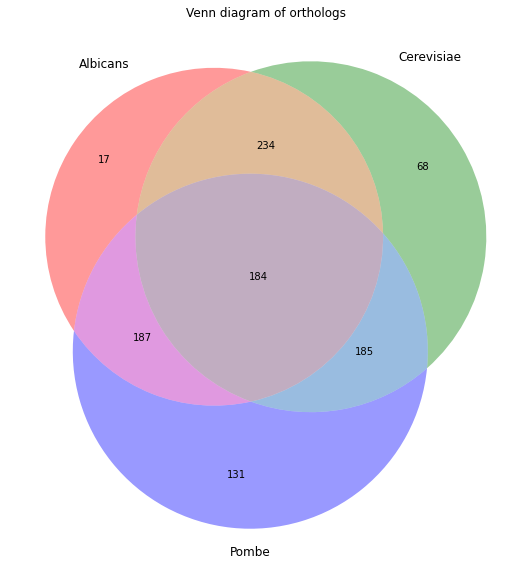

In [227]:
#create Venn diagram
import matplotlib.pyplot as plt
import matplotlib_venn
from matplotlib_venn import venn3, venn3_circles
#create venn diagram from database last 3 columns with white text
#create white background
fig, ax = plt.subplots(figsize=(10,10))


venn3(subsets=(len(database[database['albicans'] == 0]), len(database[database['cerevisiae'] == 0]), 
len(database[database['albicans'] == 1][database['cerevisiae'] == 1]), len(database[database['pombe'] == 0]), 
len(database[database['albicans'] == 1][database['pombe'] == 1]), len(database[database['cerevisiae'] == 1][database['pombe'] == 1]),
 len(database[database['albicans'] == 1][database['cerevisiae'] == 1][database['pombe'] == 1])), set_labels = ('Albicans', 'Cerevisiae', 'Pombe'),)
#make pretty
plt.title('Venn diagram of orthologs')
#chagne text to white

plt.show()

In [193]:
#column sum of albicans, cerevisiae, pombe
database.sum(axis=0)

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_62498/2494049755.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  database.sum(axis=0)


cerevisiae_name(s)    Snf1 protein kinase complex variant GAL83Snf1 ...
albicans                                                             57
cerevisiae                                                           74
pombe                                                                46
dtype: object